# Fourier Transformation and Power Spectrum

Import Libraries

In [25]:
# Import libraries
import os
import random
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.stats as stats

sys.path.append(os.path.abspath('./../../sdo_augmentation/'))
from augmentation_test import read_image
from augmentation_list import AugmentationList
from augmentation import Augmentations

Load random EUV pickle splice image and display it

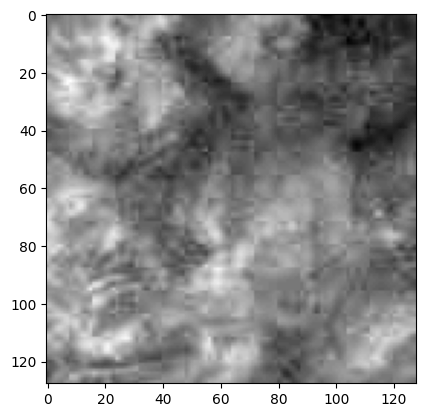

In [27]:
# Collect all pickle files and select a random one
image_paths = glob.glob('./../../AIA171_Miniset_BW/**/*.jpg', recursive = True)
image_path = random.choice(image_paths)

# Read image
image = np.array(Image.open(image_path).convert('L'))
image = image.astype(float) / 255
# Show image
plt.imshow(image, cmap = 'gray')
plt.show()

Perform random set of augmentations

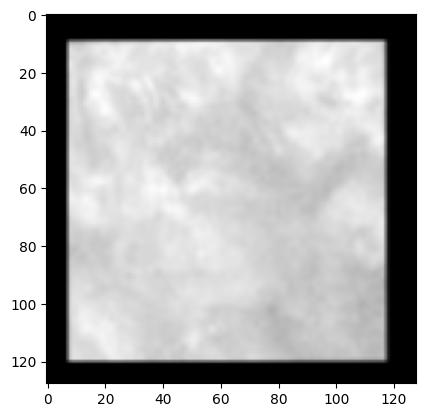

In [28]:
augmentation_list = AugmentationList('euv')
augmentation = Augmentations(image, augmentation_list.randomize())
augmented_image, _ = augmentation.perform_augmentations()

plt.imshow(augmented_image, cmap = 'gray')
plt.show()

Apply Fast Fourier on Augmented Image, and get its amplitude and phase

C:\Users\starf\AppData\Local\Temp\ipykernel_13396\1814559739.py:9: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(np.log(fourier_augmented_phases.flatten()))
C:\Users\starf\AppData\Local\Temp\ipykernel_13396\1814559739.py:9: RuntimeWarning: invalid value encountered in log
  axs[1].plot(np.log(fourier_augmented_phases.flatten()))


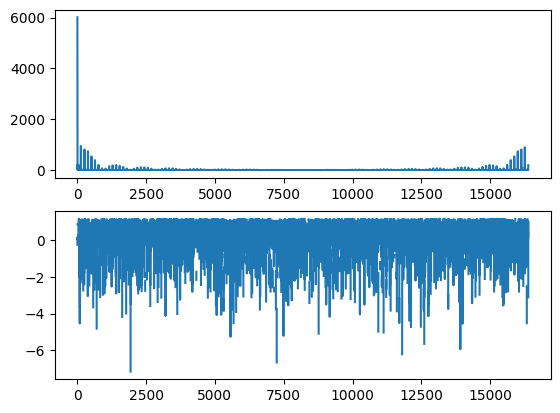

In [29]:
fig, axs = plt.subplots(2)

# Fast fourier for augmented image
fourier_augmented_image = np.fft.fftn(augmented_image)
fourier_augmented_amplitudes = np.abs(fourier_augmented_image)
fourier_augmented_phases = np.angle(fourier_augmented_image)

axs[0].plot(fourier_augmented_amplitudes.flatten())
axs[1].plot(np.log(fourier_augmented_phases.flatten()))

Create the 1D power spectrum of the Fourier Image

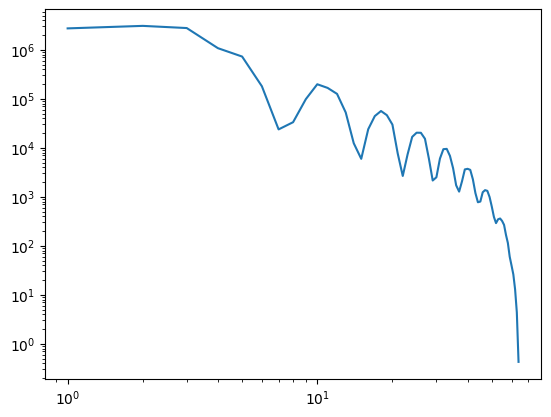

In [31]:
pixel_count = image.shape[0]

# Calculate k values
k_frequencies = np.fft.fftfreq(pixel_count) * pixel_count
k_frequencies2D = np.meshgrid(k_frequencies, k_frequencies)
k_norm = np.sqrt(k_frequencies2D[0] ** 2 + k_frequencies2D[1] ** 2)
k_bins = np.arange(0.5, pixel_count // 2 + 1, 1.)
k_vals = 0.5 * (k_bins[1:] + k_bins[:-1])

# Create power spectrum
a_bins, _, _ = stats.binned_statistic(k_norm.flatten(),
                                     (fourier_augmented_amplitudes ** 2).flatten(),
                                     statistic = "mean", bins = k_bins)
a_bins *= np.pi * (k_bins[1:] ** 2 - k_bins[:-1] ** 2)

# Plot power spectrum
plt.loglog(k_vals, a_bins)


Convert image in fourier space back to normal image